# Import libraries

In [3]:
%pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from keras import layers

2022-09-26 19:10:21.956536: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-26 19:10:26.610005: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-26 19:10:26.610050: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-26 19:10:27.057410: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-26 19:10:32.408672: W tensorflow/stream_executor/pla

# Import data

In [6]:
dataset = pd.read_csv('/workspaces/85065325/CS50/project/insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


# Data Analysis

In [7]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


4 numeric values and 3 categorical values

In [8]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

no NaN values

In [9]:
dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [10]:
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

no NaN values

In [11]:
for column in dataset:
  print(f'{column}: {pd.unique(dataset[column])}')

age: [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
sex: ['female' 'male']
bmi: [27.9 33.8 33.  22.7 28.9 25.7 33.4 27.7 29.8 25.8 26.2 26.3 34.4 39.8
 42.1 24.6 30.8 23.8 40.3 35.3 36.  32.4 34.1 31.9 28.  23.1 32.8 17.4
 36.3 35.6 28.6 28.3 36.4 20.4 20.8 36.7 39.9 26.6 36.6 21.8 37.1 37.3
 38.7 34.8 24.5 35.2 33.6 28.7 37.  31.8 31.7 22.9 27.4 33.7 24.7 25.9
 22.4 39.1 36.2 24.  24.8 28.5 28.1 32.  34.  29.6 35.5 26.9 38.3 37.6
 41.2 31.2 27.2 27.  39.5 31.3 20.  19.3 31.6 25.5 30.1 29.9 27.5 28.4
 30.9 35.1 29.7 35.7 32.2 49.1 23.4 29.  31.4 33.9 28.8 37.4 17.8 34.7
 26.5 22.  35.9 25.6 25.2 32.5 25.3 38.8 30.5 37.7 24.1 24.4 27.8 36.9
 39.6 28.2 33.2 18.9 41.5 30.3 16.  33.3 29.2 26.4 30.7 41.9 32.1 30.6
 18.1 39.3 36.1 22.3 26.7 23.2 38.1 22.2 38.4 29.1 22.1 26.8 30.  20.9
 17.3 34.2 25.4 40.2 24.3 42.4 19.8 30.2 29.4 27.6 20.6 21.6 40.6 48.1
 36.8 45.5 23.  22.6 37.5 38.  34.9 33.1 4

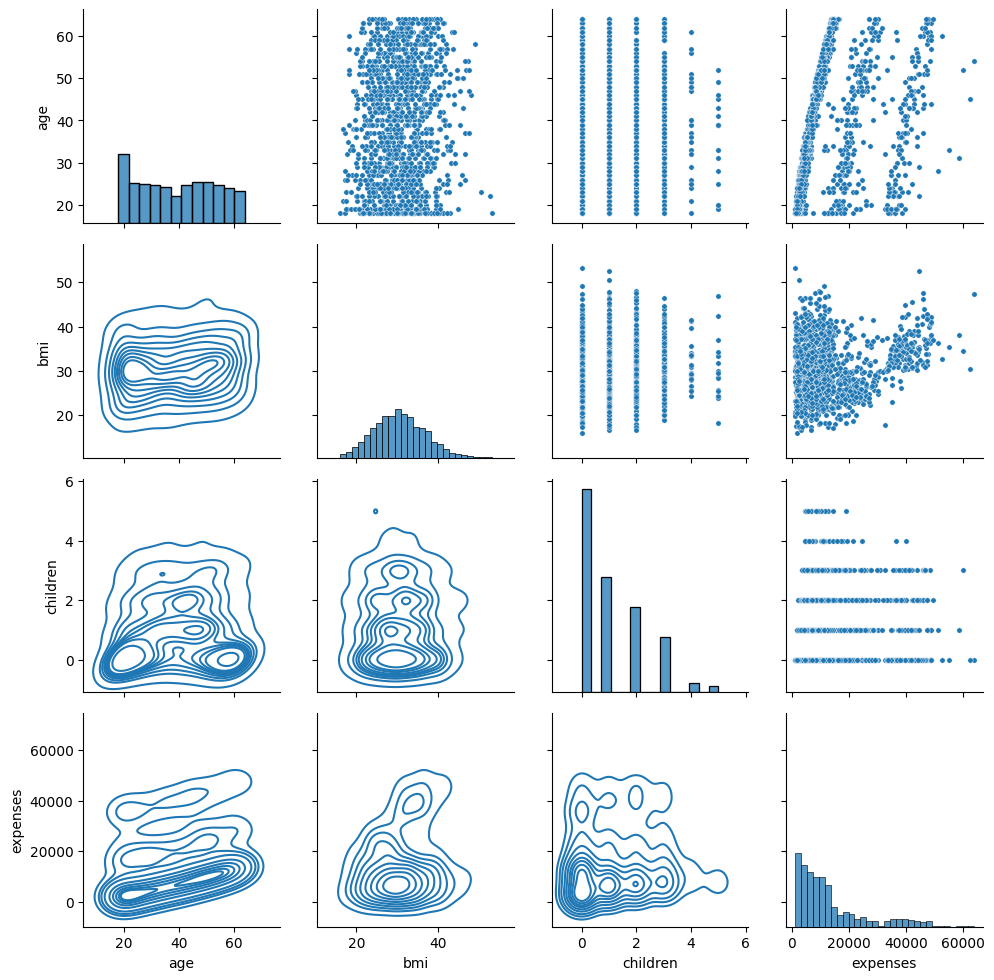

In [12]:
g = sns.PairGrid(
    dataset[['age', 'bmi', 'children' ,'expenses']]
)
g.map_upper(sns.scatterplot, s=15)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)

### Correlation between variables

/tmp/ipykernel_7834/3360969576.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='viridis')


<AxesSubplot: >

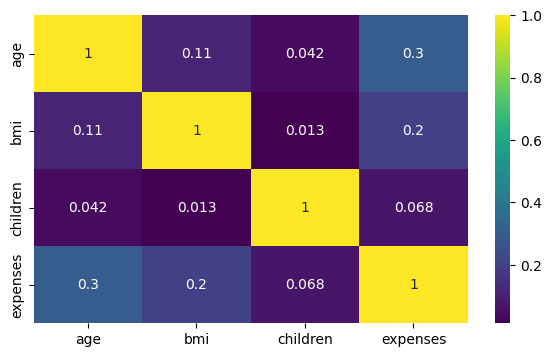

In [13]:
plt.figure(figsize=(7,4))
sns.heatmap(dataset.corr(), annot=True, cmap='viridis')

In [14]:
y = dataset.pop('expenses')
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [15]:
x = dataset
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest


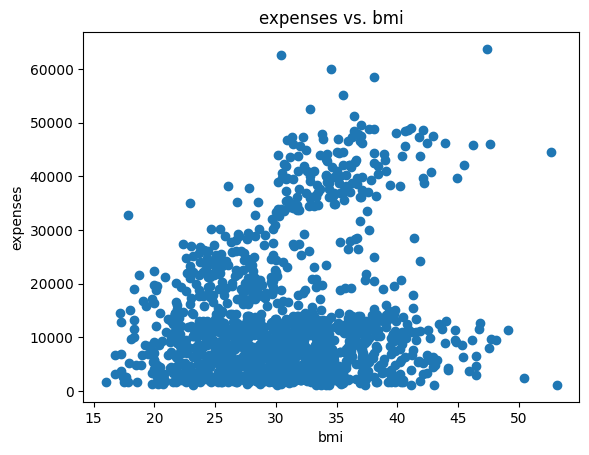

In [16]:
fig = plt.figure()
plt.scatter(x['bmi'], y)
plt.xlabel('bmi')
plt.ylabel('expenses')
plt.title('expenses vs. bmi')
plt.show()

In [17]:
x['smoker'] = x['smoker'].map({'no': 0, 'yes': 1})
x['sex'] = x['sex'].map({'female': 1, 'male': 0})

In [18]:
x = pd.get_dummies(
    x,
    columns=['region'],
    prefix='',
    prefix_sep=''
)

In [19]:
x.tail()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
1333,50,0,31.0,3,0,0,1,0,0
1334,18,1,31.9,0,0,1,0,0,0
1335,18,1,36.9,0,0,0,0,1,0
1336,21,1,25.8,0,0,0,0,0,1
1337,61,1,29.1,0,1,0,1,0,0


In [21]:
from sklearn.model_selection import train_test_split

train_dataset, test_dataset, train_labels, test_labels = train_test_split(
    x, y,
    test_size=0.2
)

test_dataset.tail()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
22,18,0,34.1,0,0,0,0,1,0
1337,61,1,29.1,0,1,0,1,0,0
1117,25,0,33.3,2,1,0,0,1,0
1274,26,0,27.1,0,1,0,0,1,0
339,46,1,27.7,1,0,0,0,1,0


In [22]:
from experimental import preprocessing

normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

2022-09-26 19:12:27.736769: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-26 19:12:27.760780: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-26 19:12:27.791395: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-11fd3e): /proc/driver/nvidia/version does not exist
2022-09-26 19:12:27.921414: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Groups a linear stack of layers into a model

In [23]:
model = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(units=1)
])

# Compile, fit and evaluate the model

In [24]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),
              loss=['mean_absolute_error'],
              metrics=['mean_absolute_error', 'mean_squared_error']
)

In [25]:
history = model.fit(
    train_dataset, 
    train_labels,
    epochs=50,
    verbose=0,
)

In [26]:
model.evaluate(
    test_dataset,
    test_labels,
    verbose=1
)

9/9 [==============================] - 0s 2ms/step - loss: 1934.3119 - mean_absolute_error: 1934.3119 - mean_squared_error: 24232378.0000


[1934.3118896484375, 1934.3118896484375, 24232378.0]

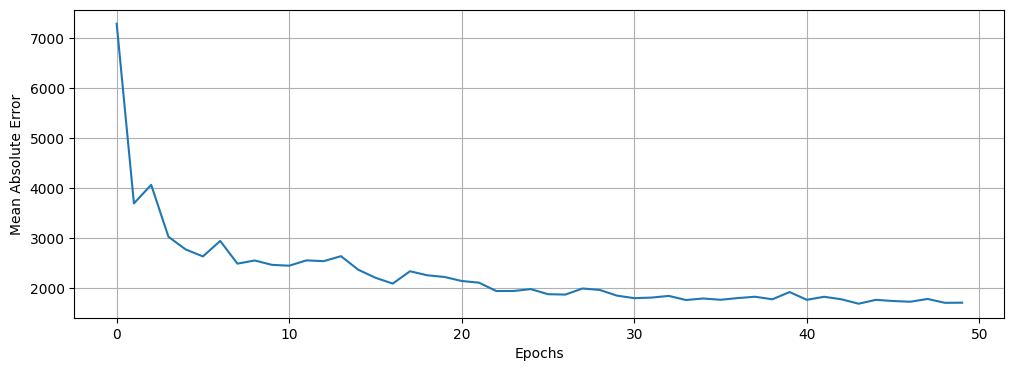

In [27]:
plt.figure(figsize=(12,4))
plt.plot(
    history.history['mean_absolute_error']
)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epochs')
plt.grid(True)
plt.show()

# Result

9/9 - 0s - loss: 1934.3119 - mean_absolute_error: 1934.3119 - mean_squared_error: 24232378.0000 - 28ms/epoch - 3ms/step
Testing set Mean Abs Error: 1934.31 expenses

9/9 [==============================] - 0s 1ms/step


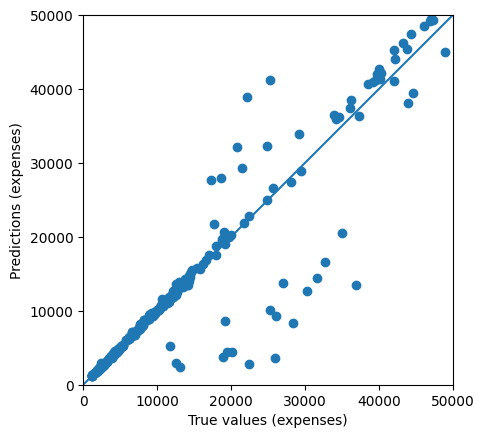

In [28]:
# Test model by checking how well the model generalizes using the test set
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses\n".format(mae))

# Plot predictions
test_predictions = model.predict(test_dataset).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)